# Read files and extract information

There is an example of how to read files and extract information from them.

suppose you have some g16log files in a folder like this:

In [ ]:
Mode                 LastWriteTime         Length Name
----                 -------------         ------ ----
-a----         2024/1/24     23:35         737924 11_Opt.log
-a----         2024/1/24     23:35          54009 3_Sp.log
-a----         2024/1/24     23:35         167953 dsgdb9nsd_000001-3-.log
-a----         2024/1/24     23:35         837576 dsgdb9nsd_000107-3-.log
-a----         2024/1/24     23:35         714776 dsgdb9nsd_000180-9-.log
-a----         2024/1/24     23:35         391900 dsgdb9nsd_000484-1+.log
-a----         2024/1/24     23:35         517622 dsgdb9nsd_000672-3+.log
-a----         2024/1/24     23:35         592434 dsgdb9nsd_000696-4.log
-a----         2024/1/24     23:35         386294 dsgdb9nsd_000763-2-.log
-a----         2024/1/24     23:35         453835 dsgdb9nsd_000923-3+.log
-a----         2024/1/24     23:35         531834 dsgdb9nsd_000955-3.log
-a----         2024/1/24     23:35         389456 dsgdb9nsd_000958-3-.log
-a----         2024/1/24     23:35         649629 dsgdb9nsd_001232-4-.log
-a----         2024/1/24     23:35         543840 dsgdb9nsd_002924-8-.log
-a----         2024/1/24     23:35         914214 dsgdb9nsd_003051-3.log
-a----         2024/1/24     23:35         260824 dsgdb9nsd_003895.log
-a----         2024/1/24     23:35         881676 dsgdb9nsd_004015-3-.log
-a----         2024/1/24     23:35         449237 dsgdb9nsd_004478-6-.log
-a----         2024/1/24     23:35         974062 dsgdb9nsd_004517-4-.log
-a----         2024/1/24     23:35         682659 dsgdb9nsd_004669-4.log
-a----         2024/1/24     23:35         459824 dsgdb9nsd_004738-2.log
-a----         2024/1/24     23:35        1356302 dsgdb9nsd_006075rearrange.log
-a----         2024/1/24     23:35         513090 dsgdb9nsd_009986.log
-a----         2024/1/24     23:35         459837 dsgdb9nsd_130366.log
-a----          2024/2/7     16:59         651007 dsgdb9nsd_131200-4-.log
-a----         2024/1/24     23:35         507221 dsgdb9nsd_131200.log
-a----         2024/1/26     23:11         926321 dsgdb9nsd_131941-4+.log
-a----         2024/1/24     23:35         548926 dsgdb9nsd_132072.log
-a----         2024/1/24     23:35         561455 dsgdb9nsd_133826.log
-a----         2024/1/24     23:35         660744 dsgdb9nsd_133858.log
-a----          2024/2/3     16:23         306231 molecule_0.log
-a----         2024/1/24     23:35          22483 r1_C2H3N3O_sp_g16.log
-a----         2024/1/24     23:35          39004 r1_C8H9N3O2_sp_g16.log
-ar---         2024/1/24     23:37        8008984 RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log
-a----         2024/1/24     23:35        1444799 S_Ph_Ni_TS.log
-a----         2024/1/24     23:35        1938783 TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log
-a----         2024/1/24     23:35          66775 TS_4cGKps_ll_ad_4-18_6-13_sp_g16.log
-a----         2024/1/24     23:35        1327055 TS_ts_guess_FaFxyx_template_4-18_6-13_optts_conf_g16.log
-a----         2024/1/24     23:35        3954965 TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log

Looks like chaos? Yes, they are mixture from some different projects. MolOP can help you to read files and extract information from them through universal methods.

In [1]:
from molop import AutoParser
from rdkit.Chem.Draw import IPythonConsole  # for better drawing

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400, 400

files = AutoParser("../tests/test_files/g16log/*.log")

MolOP parsing with 8 jobs: 100%|██████████| 39/39 [00:29<00:00,  1.34it/s]
0 files failed to parse, 39 successfully parsed


We can first get the summary of the files. The summary contains the structure information(SMILES) and some key QM information of the files.

In [2]:
files.to_summary_df()

,parser,file_name,file_path,file_format,charge,multiplicity,SMILES,status,ZPE,TCE,...,sp,HOMO,LUMO,GAP,first freq,first freq tag,second freq,second freq tag,S**2,S
0,G16LOGParser,11_Opt.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,C=C[C@H]1[C@@H]2[C@H](C[C@@]1(C)O)OC[C@@H]2C,"{'SCF Done': True, 'Normal termination': True,...",0.275585,0.287903,...,-579.925317,-0.21880,-0.01452,0.20428,76.8500,False,94.3685,False,NaN,NaN
1,G16LOGParser,3_Sp.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,CCC[C@H]1CO[C@H]2C[C@@](C)(O)C[C@@H]12,"{'SCF Done': True, 'Normal termination': True}",NaN,NaN,...,-581.780923,-0.21593,0.02581,0.24174,NaN,None,NaN,None,NaN,NaN
2,G16LOGParser,RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-An...,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,-1,1,CC(C)(C)[C@@H]1COC(=[C-]C2[N-][C@H](C(C)(C)C)C...,"{'SCF Done': True, 'Normal termination': True,...",0.643965,0.682345,...,-1828.223960,-0.06449,0.00990,0.07439,-126.5511,True,14.3776,False,NaN,NaN
3,G16LOGParser,S_Ph_Ni_TS.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,[Br-].[Br-].[Ni@OH26+3]c1ccccc1.[S-]Cc1ccccc1....,"{'SCF Done': True, 'Normal termination': True,...",0.361561,0.388680,...,-1549.053550,-0.18821,-0.11033,0.07788,-185.8656,True,15.8954,False,NaN,NaN
4,G16LOGParser,TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(/C)[O-].COC(=O)C#CC(...,"{'SCF Done': True, 'Normal termination': True,...",0.251882,0.277379,...,-1287.359810,-0.25863,-0.10047,0.15816,-300.8307,True,16.9570,False,NaN,NaN
5,G16LOGParser,TS_4cGKps_ll_ad_4-18_6-13_sp_g16.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(/C)[O-].COC(=O)C#CC(...,"{'SCF Done': True, 'Normal termination': True}",NaN,NaN,...,-1288.848920,-0.26367,-0.10703,0.15664,NaN,None,NaN,None,NaN,NaN
6,G16LOGParser,TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,C=[N+](C)[N-]C.COC(=O)[C@@]1(OC)C#CC(Br)(Br)CCCC1,"{'SCF Done': True, 'Normal termination': True,...",0.349175,0.373165,...,-6028.920709,-0.24515,-0.20404,0.04111,-56.8630,True,29.9487,False,NaN,NaN
7,G16LOGParser,TS_ts_guess_FaFxyx_template_4-18_6-13_optts_co...,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(\C)[O-].COC(=O)C#CC(...,"{'SCF Done': True, 'Normal termination': True,...",0.252491,0.277515,...,-1287.367861,-0.25447,-0.11005,0.14442,-252.4100,True,25.8663,False,NaN,NaN
8,G16LOGParser,dsgdb9nsd_000001-3-.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,-1,1,[CH3-],"{'SCF Done': True, 'Normal termination': True}",NaN,NaN,...,-39.857502,0.06578,0.17809,0.11231,NaN,None,NaN,None,NaN,NaN
9,G16LOGParser,dsgdb9nsd_000107-3-.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,-1,1,[C-]#CCC#C,"{'SCF Done': True, 'Normal termination': True}",NaN,NaN,...,-192.274958,0.00382,0.13824,0.13442,NaN,None,NaN,None,NaN,NaN


We concern about the TS in those log files.

In [3]:
TS_files = files.filter_TS()
TS_files.to_summary_df()

,parser,file_name,file_path,file_format,charge,multiplicity,SMILES,status,ZPE,TCE,...,sp,HOMO,LUMO,GAP,first freq,first freq tag,second freq,second freq tag,S**2,S
0,G16LOGParser,RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-An...,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,-1,1,CC(C)(C)[C@@H]1COC(=[C-]C2[N-][C@H](C(C)(C)C)C...,"{'SCF Done': True, 'Normal termination': True,...",0.643965,0.682345,...,-1828.223960,-0.06449,0.00990,0.07439,-126.5511,True,14.3776,False,None,None
1,G16LOGParser,S_Ph_Ni_TS.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,[Br-].[Br-].[Ni@OH26+3]c1ccccc1.[S-]Cc1ccccc1....,"{'SCF Done': True, 'Normal termination': True,...",0.361561,0.388680,...,-1549.053550,-0.18821,-0.11033,0.07788,-185.8656,True,15.8954,False,None,None
2,G16LOGParser,TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(/C)[O-].COC(=O)C#CC(...,"{'SCF Done': True, 'Normal termination': True,...",0.251882,0.277379,...,-1287.359810,-0.25863,-0.10047,0.15816,-300.8307,True,16.9570,False,None,None
3,G16LOGParser,TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,C=[N+](C)[N-]C.COC(=O)[C@@]1(OC)C#CC(Br)(Br)CCCC1,"{'SCF Done': True, 'Normal termination': True,...",0.349175,0.373165,...,-6028.920709,-0.24515,-0.20404,0.04111,-56.8630,True,29.9487,False,None,None
4,G16LOGParser,TS_ts_guess_FaFxyx_template_4-18_6-13_optts_co...,d:\Product\Useful-Code-Snippet\MolOP\tests\tes...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(\C)[O-].COC(=O)C#CC(...,"{'SCF Done': True, 'Normal termination': True,...",0.252491,0.277515,...,-1287.367861,-0.25447,-0.11005,0.14442,-252.4100,True,25.8663,False,None,None


In [6]:
TS_files[2][-1].ts_vibration_to_SDF_file()

'd:\\Product\\Useful-Code-Snippet\\MolOP\\tests\\test_files\\g16log\\TS_4cGKps_ll_ad_4-18_6-13_optts_g16.sdf'

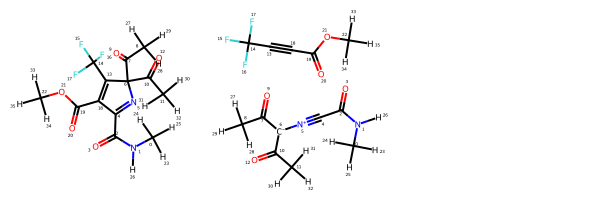

In [7]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(TS_files[2][-1].possible_pre_post_ts())